In [1]:

import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
#print('Shape of train:',train.shape,'Shape of test',test.shape)

Shape of Training Data: (891, 12) Shape of Testing Data (418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train1=train.copy()
test1=test.copy()
test_withPassengerID=test.copy()

train1.drop(columns=['PassengerId','Ticket','Cabin'],inplace=True)
test1.drop(columns=['PassengerId','Ticket','Cabin'],inplace=True)

In [7]:
def getTitle(name):
    str_1=name.split(',')[1]
    str_2=str_1.split('.')[0]
    str_3=str_2.strip()
    return str_3

for data in [train1,test1]:
    for i in range(data.shape[0]):
        data.Name[i]=getTitle(data.Name[i])

train1.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


In [9]:
train1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

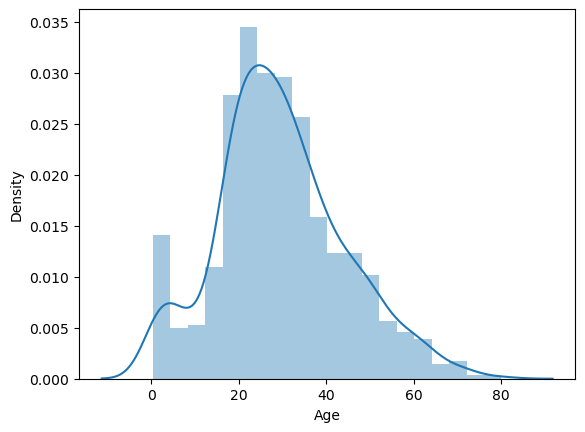

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(train1.Age)
plt.show()

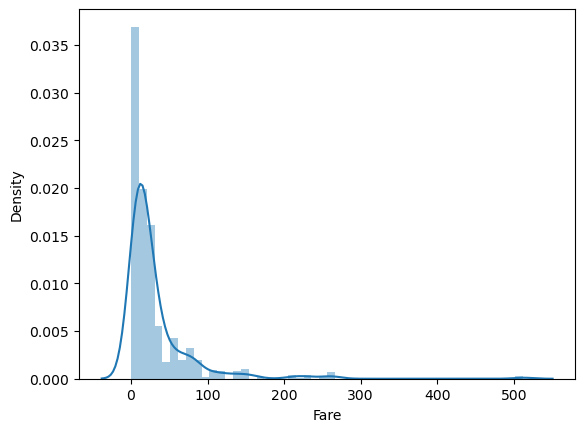

In [13]:
sns.distplot(train1.Fare)
plt.show()

In [14]:
train2=train1.copy()
test2=test1.copy()

train2.Embarked.fillna('S',inplace=True)
train2.Age.fillna(train2.Age.median(),inplace=True)

test2.Age.fillna(train2.Age.median(),inplace=True)
test2.Fare.fillna(train2.Fare.mean(),inplace=True)



In [15]:
train2.duplicated().sum()

109

In [16]:
train2.drop_duplicates(inplace=True)

0

In [17]:
train2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


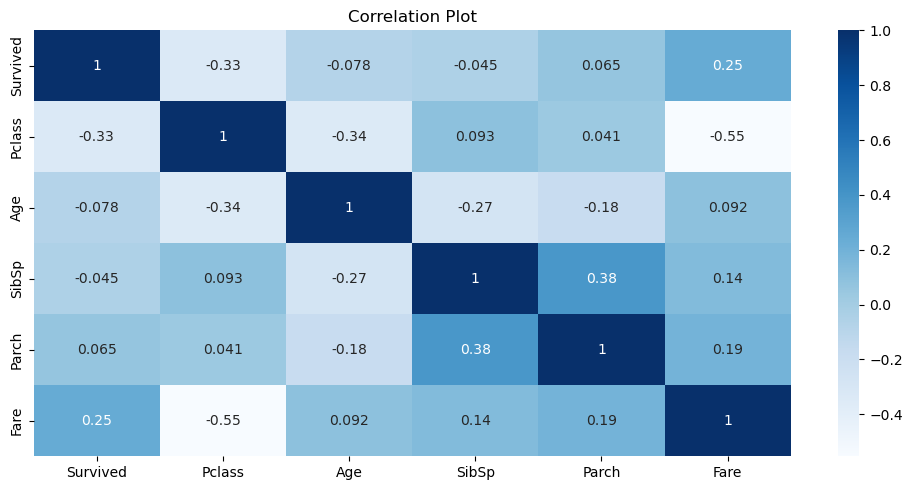

In [21]:
plt.figure(figsize=(10,5))
cor=train2.corr()
sns.heatmap(cor,annot=True,cmap='Blues')
plt.title('Correlation Plot')
plt.tight_layout()

In [22]:
data_1=pd.concat([train2,test2],axis=0,ignore_index=True)
data_1[['Pclass','SibSp','Parch']]=data_1[['Pclass','SibSp','Parch']].astype(object)
data_1=pd.get_dummies(data_1)
data_1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Name_Capt,Name_Col,Name_Don,Name_Dona,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,7.2500,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,38.0,71.2833,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,26.0,7.9250,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,35.0,53.1000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,35.0,8.0500,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
train.isna().sum()
train=data.iloc[:train2.shape[0],]
test=data.iloc[train2.shape[0]:,1:]


train.shape, test.shape

((782, 44), (418, 43))

In [24]:
train.Age=(train.Age-train.Age.mean())/train.Age.std()
train.Fare=(train.Fare-train.Fare.mean())/train.Fare.std()

test.Age=(test.Age-train.Age.mean())/train.Age.std()
test.Fare=(test.Fare-train.Fare.mean())/train.Fare.std()


(1, 1)

In [25]:
from sklearn.model_selection import train_test_split

x=train.drop(columns='Survived')
y=train.Survived

xtrain,xval,ytrain,yval=train_test_split(x,y,test_size=0.2,random_state=50,shuffle=True)

xtrain.shape,ytrain.shape,xval.shape,yval.shape

((625, 43), (625,), (157, 43), (157,))

In [26]:

def sigmoid(inX): 
    return 1.0 / ( 1 + np.exp(-inX))


In [27]:

def gradAscent(dataMat, labelMat): 
    dataMatrix=np.mat(dataMat) 
    classLabels=np.mat(labelMat).transpose() 
    m,n = np.shape(dataMatrix)
    alpha = 0.001  
    maxCycles = 100000 
    weights = np.ones((n,1)) 
    for k in range(maxCycles):
       h = sigmoid(dataMatrix * weights)
       error = (classLabels - h)    
       weights = weights + alpha * dataMatrix.transpose()* error
    return weights



In [28]:

weights=gradAscent(xtrain, ytrain).getA()
#print (weights.shape)

In [30]:

predict='0'
predict_right=0
for index, row in xval.iterrows():

    sum=sigmoid(np.dot(row, weights))
    #print(sum)
    if sum <= 0.5:
        predict = 0
    else:
        predict = 1
    if predict == yval[index]:
        predict_right += 1
print ("validation预测准确率:")
print ("%.5f" %(predict_right/157)) 

validation预测准确率:
0.81529


In [31]:
def stocGradAscent1(dataMatrix,classLabels,numIter=1000):
    dataMatrix = np.mat(dataMatrix) 
    classLabels = np.mat(classLabels).transpose()
    import random
    m,n = np.shape(dataMatrix)
    weights = np.ones((1,n))
    for j in range(numIter):
        dataIndex=list(range(m))
        for i in range(m):
            alpha = 4/(1+i+j)+0.001
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(np.sum(dataMatrix[randIndex].A * weights))
            error = float(classLabels[randIndex])-h
            weights = weights + alpha* dataMatrix[randIndex].A * error
            del(dataIndex[randIndex])
    return weights

In [32]:

weights=stocGradAscent1(xtrain, ytrain)
#print (weights.shape)

In [34]:

predict='0'
predict_right=0
for index, row in xval.iterrows():
    row = row.values
    sum=sigmoid(np.sum(weights * row))
    if sum <= 0.5:
        predict = 0
    else:
        predict = 1
    if predict == yval[index]:
        predict_right += 1
print ("validation预测准确率:")
print ("%.5f" %(predict_right/157)) 

validation预测准确率:
0.77070


In [426]:

predict= []

predict_right=0
for index, row in test.iterrows():
    row = row.values
    sum=sigmoid(np.sum(weights * row))
    
    if sum <= 0.5:
        predict.append('0')
    else:
        predict.append('1')
test.head()
output = pd.DataFrame({'PassengerId': test_withPassengerID.PassengerId ,'Survived': predict})
output.to_csv('submission.csv', index=False)

In [27]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
lr=model.fit(xtrain,ytrain)

from sklearn.model_selection import cross_val_score
train_score=cross_val_score(lr,xtrain,ytrain,scoring='accuracy',cv=10).mean()
val_score=cross_val_score(lr,xval,yval,scoring='accuracy',cv=10).mean()

print('train score:',train_score,'validation score:',val_score)

train score: 0.7968766001024066 validation score: 0.7641666666666667
